# Problem Set 2 - Zane Bayer - CSCI520 - 3/29/2022

## *Learning From Data*


### EX. 3.1 

### No, the stopping criteria for the PLA is that no points are misclassified. While there are points misclassified (which there always will be when the data is not linearly separable), there is always a point for the pla to pick and update the weights with.

### Ex. 3.7

### the in-sample error, $E_{in}(\vec{w})$, is given by
### <center>$E_{in}(\vec{w})=\frac{1}{N}\sum_{n=1}^N ln(1+e^{-y_n\vec{w}^T\vec{x}_n})$</center> 
### The gradient of $E_{in}(\vec{w})$ with respect to the weight vector $\vec{w}$ is 

### <center>$∇E_{in}(\vec{w})=\frac{∂}{∂\vec{w}}[\frac{1}{N}\sum_{n=1}^N ln(1+e^{-y_n\vec{w}^T\vec{x}_n})]$</center>
### <center>$=\frac{1}{N}\sum_{n=1}^N (\frac{1}{1+e^{-y_n\vec{w}^T\vec{x}_n}})[\frac{∂}{∂\vec{w}}(1+e^{-y_n\vec{w}^T\vec{x}_n})$]</center>

### <center>$=\frac{1}{N}\sum_{n=1}^{N}\frac{-y_n\vec{x}_ne^{-y_n\vec{w}^T\vec{x}_n}}{1+e^{-y_n\vec{w}^T\vec{x}_n}} $</center>

### <center>$=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_n\vec{x}_n}{1+e^{y_n\vec{w}^T\vec{x}_n} }$</center>

### <center>$=\frac{1}{N}\sum_{n=1}^{N}-y_n\vec{x}_n\theta(-y_n\vec{w}^T\vec{x}_n)$</center>

### where $\theta(x)$ is the sigmoid function. 
### From the last problem set, we know how the product $-y_n\vec{w}^T\vec{x}_n$ behaves when $\vec{x}$ is classified correcly and incorrectly. That is, when $\vec{x}$ is correctly labeled, then $-y_n\vec{w}^T\vec{x}_n>0$ and when $\vec{x}$ is mislabeled, then $-y_n\vec{w}^T\vec{x}_n<0$. The sigmoid function $\theta(x)$ is greater than $\frac{1}{2}$ for $x>0$ and less than $\frac{1}{2}$ for $x<0$. So, for a misclassified point, the argument will be positive and thus greater than $\frac{1}{2}$, while a correctly labeled point will have a negative argument and produce a value less than $\frac{1}{2}$. So, misclassified points produce larger values in the sum compared to correcly classified points, thus contributes more to the gradient.

### EX. 3.8

### The derivation of $\hat{v}$ relied on expanding $E_{in}$ as a Taylor series. In doing so, we assumed that we could ignore the higher order terms $O(η^2)$ due to their trivial size. However, this only holds when $η<<1$. For larger $\eta$, we can not ignore the higher order terms and garuntee that $\hat{v}$ points in the direction of largest decrease.

### EX. 3.9



(0.0, 3.0)

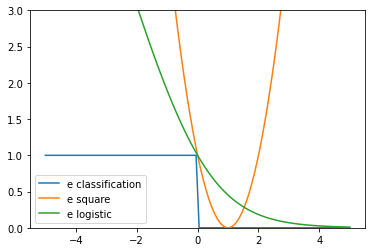

In [1]:
#a

#The classification, sum of squares, and logistic error functions for true value of y=1 

import numpy as np
import matplotlib.pyplot as plt

y=1
eClass= lambda s: y != np.sign(s)
eSq= lambda s: (y-s)**2
eLog= lambda s: np.log(1+np.exp(-y*s))

x=np.linspace(-5,5,100)

classVals=eClass(x)
sqVals=eSq(x)
logVals=(1/np.log(2))*eLog(x)

plt.plot(x,classVals,label='e classification')
plt.plot(x,sqVals,label='e square')
plt.plot(x,logVals,label='e logistic')
plt.legend()
plt.ylim(0,3)

### b. It's clear from the plot that $e_{class}≤e_{sq}$, but it can be shown analytically as well. 

### For y=1:
### For $s<0$, we have $e_{class}=1$ and $e_{sq}=(1-s)^2$. Since $s<0$, then $e_{sq}=(1+s)^2$ which clearly satifies $1\le(1+s)^2$ for all values $s<0$.

### For $s\ge0$, we have $e_{class}=0$ and $e_{sq}=(1-s)^2$. Clearly, $e_{sq}>0$ for all points except s=1 where $e_{sq}=0$. So, we have $(1-s)^2\ge0$ and since $e_{class}=0$ in this region, it follows that $(1-s)^2\ge e_{class}$.


### For y=-1:
### For s<0, we have $e_{class}=0$ and $e_{sq}=(-1-s)^2$. Clearly, $e_{sq}>0$ for all points except s=-1 where $e_{sq}=0$. We have a similar set of conditions as the case for $s\ge0$ and $y=1$. We can conclude that $(-1-s)^2\ge0$, thus  $(-1-s)^2\ge e_{class}$.

### For $s\ge0$, we have $e_{class}=1$ and $e_{sq}=(-1-s)^2$. For all positive values, clearly -1-s<-1, so $(-1-s)^2>1$. Where s=0, $e_{class}=e_{sq}=1$, so in all, we have $(-1-s)^2\ge e_{class}$.

### The above shows that $e_{sq} \ge e_{class}$ for all pairs of values (s,y).

### <br/>
### c. See below for comparison in all cases of pairs (s,y).

### For y=1:
### For s<0, we have $e_{class}=1$ and $e_{log}=\frac{1}{log(2)}log(1+e^{-s})$. $e_{log} → ∞$  as $s→ -∞$, and in this region has a minimum as $s → 0^- $ of 1. So, we have $e_{log}>1$ and therefore $e_{log}>e_{class}$.

### For $s\ge0$, we have  $eclass=0$  and  $e_{log}=\frac{1}{log(2)}log(1+e^{-s})$. $e_{log}$ is bouned above 1 and below by zero since $e^{-s}>0$ for all s, so $log(1+e^{-s})>0$. So, we get $e_{log}\ge e_{class}$.

### For y=-1:
### s<0, we have $e_{class}=0$ and $e_{log}=\frac{1}{log(2)}log(1+e^{s})$. $e_{log} → 0$  as $s→ -∞$, but is always greater than zero since $1+e^{-s}>0$, so therefore we get $e_{log}>0$ and $e_{log}>e_{class}$.


### For $s\ge 0$, we have $e_{class}=0$ and $e_{log}=\frac{1}{log(2)}log(1+e^{s})$. $e_{log}→ ∞$ as $s→ ∞$ and is bounded below at s=0 where $e_{log}=1$. Since $e_{log}$ only has positive slope in this region, we can simply conclude that $e_{log}\ge 1$ and therefore $e_{log}\ge e_{class}$.

### The above shows that $\frac{1}{log(2)}e_{log} \ge e_{class}$ for all pairs (s,y).

## *Pattern Recognition and Machine Learning*


### 2.43

### We are old that
### <center>$p(x|\sigma ^2,q)=\frac{q}{2(2\sigma ^2)^{1/q}\Gamma(\frac{1}{q})}exp(-\frac{|x|^q}{2\sigma ^2})$</center>
### The above implies that $p(x|\sigma ^2,q)$ is centered at zero, so $\mu=0$. We can use of the symmetry about to simplify the integral. We wish to show 
### <center>$\int_{-∞}^{∞}p(x|\sigma ^2,q)dx=1$</center> 
### Since the exponential is the only term dependent on x, allow
### <center>$c=\frac{q}{2(2\sigma ^2)^{1/q}\Gamma(\frac{1}{q})}$</center>
### so that 
### <center>$\int_{-∞}^{∞}p(x|\sigma ^2,q)dx=c\int_{-∞}^{∞}exp(-\frac{|x|^q}{2\sigma ^2})dx$</center> 
### Since the integral is symmetric about x=0
### <center>$=2c\int_{-∞}^{\infty}exp(-\frac{x^q}{2\sigma^2})dx$</center>
### Allow $u=\frac{x^q}{2\sigma^2}⇒\frac{du}{dx}=q\frac{x^{q-1}}{2\sigma^2}⇒dx=\frac{2\sigma^2}{qx^{q-1}}du$, so we get
### <center>$=2c\int_{0}^{∞}exp(-u)(\frac{2\sigma^2}{qx^{q-1}}du)$</center>
### $u=\frac{x^q}{2\sigma^2} ⇒ x=(2\sigma^2u)^{1/q}$, so
### <center>$=\frac{4\sigma ^2}{q}c\int_{0}^{\infty}exp(-u)[(2\sigma^2u)^{1/q}]^{1-q}du$</center>
### <center>$=\frac{4\sigma ^2}{q}c\int_{0}^{\infty}exp(-u)(2\sigma^2u)^{1/q-1}du$</center> 
### <center>$=\frac{4\sigma ^2}{q}(2\sigma^2)^{1/q-1}c\int_{0}^{\infty}exp(-u)u^{1/q-1}du$</center>
### the gamma function is $Γ(x)=∫_{0}^{∞}u^{x-1}exp(-u)du$. Plugging this into the above gives
### <center>$=\frac{4\sigma ^2}{q}(2\sigma^2)^{1/q-1}cΓ(\frac{1}{q})$</center>
### Plugging back in for c gives the desired result
### <center>$\int_{-∞}^{∞}p(x|\sigma ^2,q)dx=1$</center>

</br>

### Now it's simple to show that $p(x|\sigma ^2,q)$ reduces to the usual Guassian distribution in the case of q=2.
<center>$p(x|\sigma ^2,2)=\frac{2}{2\sqrt{2\sigma^2}\Gamma(1/2)}exp(-\frac{x^2}{2\sigma^2})$</center>
<center>$=\frac{1}{\sqrt{2\sigma^2\pi}}exp(-\frac{x^2}{2\sigma^2})$</center>

### which defines the Guassian distribution centered about $\mu=0$. 

</br>

### We'll now consider the second half of the problem where we are told a random variable $ϵ $ is drawn from the probability distribution above and $ϵ=t_n-y(\vec{x},\vec{w})$ for a set of input vectors $X=\{\vec{x}_1,...,\vec{x}_N\}$ and targets $\vec{t}=(\vec{t}_1,...,\vec{t}_N)^T$. The log liklihood over $\vec{w}$ and $\sigma^2$ is 

###<center>$\sum_{n=1}^{N}ln[p((y(\vec{x}_n,\vec{w})-t)|\sigma^2,q)]$</center>
###<center>$=\sum_{n=1}^{N}ln[\frac{q}{2(2\sigma ^2)^{1/q}\Gamma(\frac{1}{q})}exp(-\frac{|y(\vec{x}_n,\vec{w})-t|^q}{2\sigma ^2})]$</center>
### <center>$=\sum_{n=1}^{N}-\frac{|y(\vec{x}_n,\vec{w})-t|^q}{2\sigma ^2}+ln[\frac{q}{2(2\sigma ^2)^{1/q}\Gamma(\frac{1}{q})}]$</center>
### <center>$=-\frac{1}{2σ^2}∑_{n=1}^{N}|y(\vec{x}_n,\vec{w})-t|^q+Nln(\frac{1}{(2\sigma^2)^{1/q}})+const.$</center>
###  <center>$=-\frac{1}{2σ^2}∑_{n=1}^{N}|y(\vec{x}_n,\vec{w})-t|^q+\frac{N}{q}ln(2\sigma^2)+const.$</center>
### which is the desired result.

### 3.1

### This can be done direclty. The hyperbolic tangent function is
### <center>$tanh(a)=\frac{e^a-e^{-a}}{e^a+e^{-a}}$</center>
### and the sigmoid function is 
### <center>$\sigma(a)=\frac{1}{1+e^{-a}}$</center>
### so
### $2\sigma(2a)-1=\frac{2}{1+e^{-2a}}-1=\frac{2}{1+e^{-2a}}-\frac{1+e^{-2a}}{1+e^{-2a}}=\frac{1-e^{-2a}}{1+e^{-2a}}=(\frac{e^a}{e^a})(\frac{1-e^{-2a}}{1+e^{-2a}})=\frac{e^a-e^{-a}}{e^a+e^{-a}}=tanh(a)$

</br>

### To find the relationship between the coefficients $\vec{u}$ and $\vec{w}$, we simply replace $tanh(a)$ with $2\sigma(2a)-1$ and solve. First, allow $a_j=\frac{x-\mu_j}{2s}$, then 
### <center>$y(\vec{x},\vec{w})=w_0+\sum_{j=1}^{M}w_j\sigma(\frac{x-\mu_j}{s})$</center>
### <center>$=w_0+\sum_{j=1}^{M}w_j\sigma(2a)$</center>
### <center>$=w_0+\sum_{j=1}^{M}\frac{w_j}{2}(2\sigma(2a)-1+1)$</center>
### then by the relation $tanh(a)=\frac{e^a-e^{-a}}{e^a+e^{-a}}$, we get 
### <center>$=u_0+\Sigma_{j=1}^{M}u_jtanh(a_j)$</center>
### so comparing the two equations in the first and last lines, we see that the coefficients are related by $u_j=\frac{w_j}{2}$ and $u_0=w_0+\Sigma_{j=1}^M \frac{w_j}{2}$.

### 3.2


### The pseudo-inverse of a matrix A is $A^†=(A^TA)^{-1}A^T$. We can rewrite the given matrix as 
### <center>\$\Phi(\Phi^T\Phi)^{-1}\Phi^T=\Phi\Phi^†$</center>

### Suppose now that this matrix acts on a vector $\hat{v}$,
### <center>$\Phi\Phi^†\hat{v}$</center>
### Allow $\vec{v}'=\Phi^†\vec{v}$, then by definition the linear transformation described by $\Phi^†$ acting on $\vec{v}$ projects $\vec{v}$ onto the space spanned by the columns of $\Phi^†$. By the same definition, the transformation described by
###<center>$\Phi\Phi^†\vec{v}=\Phi\vec{v}'$</center>
### maps $\vec{v}'$ from the space spanned by the columns of $Φ^†$ to the space spanned by the columns of $Φ$. So, in all, the matrix 

### <center>$\Phi(\Phi^T\Phi)^{-1}\Phi^T$</center>
### projects any vector $\vec{v}$ onto the space spanned by $\Phi$.

</br>

### We'll now consider the second part of the exercise focused on the least-squares solution. Figure 3.2 is shown below.
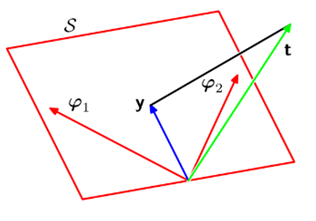

### the text, in sec. 3.1.2, tells us the sum of squares error is given by the squared euclidean distance between $\vec{y}$ and $\vec{t}$ and that $\vec{y}=\Phi\vec{w}_{ML}$. Thus, we wish to show that the difference $(\vec{y}-\vec{t})$ is othogonal to the column space of $\Phi$. This can be done directly.

### <center>$(\vec{y}-\vec{t})\Phi=(\Phi w_{ML}-t)^T\Phi$</center>
### From eq. 3.15, $w_{ML}=\Phi^†t$, we get 
### <center>$=(\Phi \Phi^† t-t)^T\Phi$</center>
### <center>$=t^T(\Phi \Phi^†-I)^T\Phi$</center>
### where  is the identity matrix.
### <center>$=t^T(\Phi \Phi^† \Phi-\Phi)^T$</center>
### by definiton $\Phi^\dagger \Phi=I$, so
### <center>$=t^T(\Phi-\Phi)^T=0$</center>
### which shows that $(\vec{y}-\vec{t})$ is orthogonal to the column space of $\Phi$.

### 4.1

### We are told that we can define the convex hull of a set of pt.'s $\{\vec{x_n}\}$ as 
### <center> $\vec{x}=\sum_n \alpha_n\vec{x}_n$

###  where $\alpha_n \ge 0$ and $\sum_n \alpha =1$. We are also told that two sets, $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$, will be linearly separable if there exists a vector $\hat{w}$ and scalar $w_0$ such that $\hat{w}^T\vec{x}_n+w_0>0$ for all $\vec{x}_n$ and $\hat{w}^T\vec{y}_n+w_0<0$ for all $\vec{y}_n$. However, if the 2 sets are not linearly seperable, then there exists at least one pt. $\vec{z}$ which lies in the intersection of the two convex hulls and satisfies 
### <center> $\vec{z}=\sum_n \alpha_n\vec{x}_n=\sum_m \beta_m\vec{y}_m$
### where $\beta_m$ has the same properties as $\alpha_n$. If the two sets are linearly seperable, then this pt. $\vec{z}$ must also satisfy both $\hat{w}^T\vec{z}+w_0>0$ and $\hat{w}^T\vec{z}+w_0<0$ since it lies in the intersection of the two sets. Clearly, this is a contradiction which can never be satisfied. Therefore, if there exists a pt. $\vec{z}$ satisfying 
 
 ### <center>$\vec{z}=\sum_n \alpha_n\vec{x}_n=\sum_m \beta_m\vec{y}_m$
 ### for two sets $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$, then the two sets  $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$ are not linearly separable. We now wish to show that if two sets are linearly separable, then their convex hulls do not intersect. If two sets  $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$ are linearly seperable, then by definition there exists a vector $\hat{w}$ and scalar $w_0$ such that $\hat{w}^T\vec{x}_n+w_0>0$ for all $\vec{x}_n$ and $\hat{w}^T\vec{y}_n+w_0<0$ for all $\vec{y}_n$. The plane defined by $\vec{w}$ separates the two sets into 2 distinct halfplanes. Also, by the fact that  $\hat{w}^T\vec{x}_n+w_0>0$ for all $\vec{x}_n$ and $\hat{w}^T\vec{y}_n+w_0<0$ for all $\vec{y}_n$, it follows no pt. $\vec{z}$ from either set satisfies $\hat{w}^T\vec{z}+w_0=0$. In other words, there are no pt.'s in either set that lie on the plane separate $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$. The convex hulls are two subsets of $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$ , so no pt.'s in the convex hulls can satisfy 
 ### <center>$\vec{z}=\sum_n \alpha_n\vec{x}_n=\sum_m \beta_m\vec{y}_m$
 ### Since no pt. $\vec{z}$ satisfies the above, we can conclude that the convex hulls of $\{\vec{x_n}\}$ and $\{\vec{y_n}\}$ do not intersect.

### 4.7  

### The sigmoid function is $\sigma(x)=\frac{1}{1+e^{-x}}$. the property can shown directly. 
### <center>$1-\sigma(a)=\frac{1+e^{-a}}{1+e^{-a}}-\frac{1}{1+e^{-a}}=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{e^a(1+e^{-a})}=\frac{1}{e^a+1}=\sigma(-a)$</center>

</br>

### The inverse of the sigmoid can also be found directly. Allow $y=\sigma(x)$, so 
### <center>$y=\sigma(x)=\frac{1}{1+e^{-x}}$</center>
### <center>$⇒ 1+e^{-x}=\frac{1}{y}$</center>
### <center>$⇒ e^{-x}=\frac{1}{y}-1$</center>
### <center>$⇒ -x=ln(\frac{1}{y}-1)$</center>
### <center>$⇒ x=-ln(\frac{1-y}{y})$</center>
### <center>$⇒ x=ln(\frac{y}{1-y})$</center>

### Thus the inverse of the sigmoid function is  $\sigma^{-1}(y)=ln(\frac{y}{1-y})$. 

### 4.12

### eq. 4.88 is $\frac{d\sigma}{da}=\sigma(1-\sigma)$
### eq. 4.59 is $\sigma(a)=\frac{1}{1+e^{-a}}$

### Taking the derivative directly yields
### $\frac{d\sigma}{da}=(-1)(1+e^{-a})^{-2}(-e^{-a})=\frac{e^{-a}}{(1+e^{-a})^2}=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^{-a}}\frac{1}{1+e^{a}}=\sigma(a)\sigma(-a)$

### From exercise 4.7 we know $\sigma(-a)=1-\sigma(a)$, so we have the desired result
### <center>$\frac{d\sigma}{da}=
\sigma(a)(1-\sigma(a))$</center>

### 4.13
### eq. 4.90 is 
### <center>$E(\vec{w})=-ln(p(\vec{t}|\vec{w}))=-\sum_{n=1}^{N}\{t_ny_n+(1-t_n)ln(1-y_n)\}$</center>
### which after subbing in for the dependecies on $\vec{w}$ yields
### <center>$E(\vec{w})=-\sum_{n=1}^{N}\{t_nln(\sigma(\vec{w}^T\phi_n))+(1-t_n)ln(1-\sigma(\vec{w}^T\phi_n)\}$</center>
### Taking the gradient of $E(\vec{w})$ yields
### <center>$\nabla E(\vec{w})= \frac{∂E}{∂\vec{w}}=\frac{∂}{∂w⃗}[-\sum_{n=1}^{N}\{t_nln(\sigma(\vec{w}^T\phi_n))+(1-t_n)ln(1-\sigma(\vec{w}^T\phi_n)\}]$</center>
### This derivative can be more easily evaluated using eq. 4.88, $\frac{d\sigma}{da}=\sigma(1-\sigma)$
### <center>$ =-\sum_{n=1}^{N}\{t_n\frac{1}{\sigma(\vec{w}^T\phi_n)}[\sigma(\vec{w}^T\phi_n)(1-\sigma(\vec{w}^T\phi_n))]\phi_n+(1-t_n)\frac{1}{1-\sigma(\vec{w}^T\phi_n)}[-\sigma(\vec{w}^T\phi_n)(1-\sigma(\vec{w}^T\phi_n))]\phi_n\}$</center>
### <center>$ =-\sum_{n=1}^{N}\{t_n(1-\sigma(\vec{w}^T\phi_n))\phi_n+(1-t_n)(-\sigma(\vec{w}^T\phi_n))\phi_n\}$</center>
### <center>$ =-\sum_{n=1}^{N}[t_n-t_n\sigma(\vec{w}^T\phi_n)-(\sigma(\vec{w}^T\phi_n)-t_n\sigma(\vec{w}^T\phi_n))]\phi_n$</center>
### <center>$ =-\sum_{n=1}^{N}(t_n-\sigma(\vec{w}^T\phi_n))\phi_n$</center>
### <center>$ =\sum_{n=1}^{N}(\sigma(\vec{w}^T\phi_n)-t_n)\phi_n$</center>
### setting $y_n=\sigma(\vec{w}^T\phi_n)$ gives the desired result
### <center>$\nabla E(\vec{w})=\sum_{n=1}^{N}(y_n-t_n)\phi_n$</center>

### 4.14

### The liklihood function for the logistic regresion model is given by eq. 4.89,
### <center> $p(\vec{t}|\vec{w})=Π_{n=1}^{N} y_n^{t_n}\{1-y_n\}^{1-t_n}$
### where $\vec{t}=(t_1,...,t_n)^T$ and $y_n=p(C_1|\phi_n)$ which is given by eq. 4.87,
### <center> $p(C_1|\phi_n)=\sigma(\vec{w}^T\phi$)
### Eq. 4.87 gives the probability that a point is classified into class $C_1$ given the input vector $\phi$. Accoringly, the probability of the point being classified into the other class $C_2$ is $1-p(C_1|\phi_n)$. We'll return to these probabilities below. First, we take the negative logarithm of both sides of eq. 4.89 yielding eq. 4.90,

### <center>$E(\vec{w})=-ln(p(\vec{t}|\vec{w}))=-\sum_{n=1}^{N}\{t_ny_n+(1-t_n)ln(1-y_n)\}$</center>
### where $y=\sigma(a_n)$ and $a_n=\vec{w}^T\phi_n$. Taking the gradient of eq. 4.90 was the focus of problem 4.13 and is given by eq. 4.91,
### <center>$\nabla E(\vec{w})=\sum_{n=1}^{N}(y_n-t_n)\phi_n$</center>
### Obviously, the log liklihood is maximized when
### <center> $\nabla E(\vec{w})=0⇒\sum_{n=1}^{N}(y_n-t_n)\phi_n=0⇒y_n=t_n⇒\sigma(\vec{w}^T\phi_n)=t_n$
### Now back to the probabilities. The above line tells us that the equation is optimized when $\sigma(\vec{w}^T\phi_n)=t_n$, which is equivalent to $p(C_1|\phi_n)=t_n$. We know our dataset is linearly seperable into two classes $C_1$ and $C_2$, so let $t_n=1$ when the data pt. belongs to $C_1$ and $t_n=0$ if it belongs to class $C_2$. the model is then optimized in the by $\vec{w}→∞$, since
### <center> $\displaystyle \lim_{\vec{w} \to ∞} p(C_1|\phi_n)=1$
### <center> $\displaystyle \lim_{\vec{w} \to ∞} 1-p(C_1|\phi_n)=0$ 
### So, the max liklihood function maximized when $\vec{w}→∞$. The same will hold in the case where $\vec{w}→-∞$ except the labels will be flippped for each data pt. . So, in all, eq. 4.89 is optimized for a linearly seperable dataset when $|\vec{w}|→∞$. 

### 4.17
### The softmax function is given as eq. 4.104,
### <center>$p(C_k|\phi_n)=y_k(\phi)=\frac{exp(a_k)}{\sum_j exp(a_j)}$</center>
### where $a_k$ is defined by eq. 4.105,
### <center>$a_k=\vec{w}^T_k \phi$</center>
### First, consider the case where k=j, so 
### <center>$y_k(\phi)=\frac{exp(a_j)}{\sum_j exp(a_j)}$ and $\frac{∂y_k}{∂a_j}=\frac{∂y_k}{∂a_k}$</center>
### By the quotient rule, $\frac{∂y_k}{∂a_k}$ is given by
### <center>$\frac{∂y_k}{∂a_k}=\frac{exp(a_j)\sum_j exp(a_j)-[exp(a_j)]^2}{[\sum_j exp(a_j)]^2}$</center>
### <center>$\frac{∂y_k}{∂a_k}=\frac{exp(a_j)}{\sum_j exp(a_j)}-[\frac{exp(a_j)}{\sum_j exp(a_j)}]^2$</center>
### <center>$=y_k-y_k^2=y_k(1-y_k)$</center>
### Now condsider the case where $k\neq j$. Taking the derivative directly yields

### <center>$\frac{\partial y_k}{\partial a_j}=(-1)(\sum_{j}exp(a_j))^{-2}(exp(a_k))exp(a_j)$</center>
### <center>$=-\frac{exp(a_k)exp(a_j)}{[\sum_j exp(a_j)]^2}=-\frac{exp(a_k)}{\sum_j exp(a_j)}(-\frac{exp(a_j)}{\sum_j exp(a_j)})=-y_ky_j$</center>

### the two results can be combined into matrix/vector form with the identity matrix giving the desired result (eq. 4.106)
### <center>$\frac{∂y_k}{∂a_j}=y_k(I_{kj}-y_j)$</center>


### 4.18

### The cross-entropy error function is defined as eq. 4.108,
### <center>$E(\vec{w}_1,...,\vec{w}_k)=-ln(p(T|\vec{w}_1,...,\vec{w}_k))=-\sum_{n=1}^{N}\sum_{k=1}^{K} t_{nk}ln(y_{nk})$
### For convience the double summation will be expressed as $\sum \sum$ for the next several lines.
### <center>$\nabla_{\vec{w}_j} E(\vec{w}_1,...,\vec{w}_k)=\frac{∂}{∂\vec{w}}[-\sum \sum t_{nk}ln(y_{nk})]=-\sum \sum \frac{∂}{∂\vec{w}}[t_{nk}ln(y_{nk})]$


### Recall $y_{nk}=y_k(\phi_n)$ and eq.'s 4.104 and 4.105
### <center>$y_k(\phi)=\frac{exp(a_k)}{\sum_j exp(a_j)}$
### <center> $a_k=\vec{w}^T\phi$
### By making use of the cahin rule, the derivative can be as
### <center> $\sum \sum t_{nk} \frac{∂}{∂\vec{w}}[ln(y_{nk})]=\sum \sum t_{nk}(\frac{∂}{∂y_{nk}}(ln(y_{nk}))(\frac{∂y_{nk}}{∂\vec{w}})$
### <center> $=-\sum \sum t_{nk} (\frac{∂}{∂y_{nk}}(ln(y_{nk}))(\frac{∂y_{nk}}{∂a_j})(\frac{\partial a_j}{∂ \vec{w}_j}) $
### Making use of eq. 4.106, $\frac{∂y_k}{∂a_j}=y_k(I_{kj}-y_j)$, we get
### <center> $-\sum \sum t_{nk}(\frac{1}{y_{nk}}) [y_{nk}(I_{kj}-y_{nj})](\phi_n)$ 
### <center> $=-\sum \sum t_{nk} (I_{kj}-y_{nj})\phi_n$ 
### <center> $=-[\sum \sum t_{nk}I_{kj}\phi_n - \sum \sum t_{nk}y_{nj}\phi_n]$
### <center> $= \sum \sum t_{nk}y_{nj}\phi_n-\sum \sum t_{nk}I_{kj}\phi_n$
### since $t_{nk}I_{kj}=t_{nj}$,
### <center>  $= \sum \sum t_{nk}y_{nj}\phi_n-\sum t_{nj}\phi_n$
### We can now consider the summations themselves by first recalling that by definition $\sum_{k=1}^{K} t_{nk}=1$. Making use of this reduces the equation to
### <center> $=\sum_{n=1}^{N} y_{nj}\phi_n-\sum_{n=1}^{N}t_{nj}\phi_n$ 
### <center> $=\sum_{n=1}^{N} (y_{nj}-t_{nj})\phi_n$
### which is the desired result
### <center> $\nabla_{\vec{w}_j} E(\vec{w}_1,...,\vec{w}_k)=\sum_{n=1}^{N} (y_
{nj}-t_{nj})\phi_n$

